<a href="https://colab.research.google.com/github/JamesChoi722/JamesChoi722/blob/main/Time_series_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Challenge: Time series analysis

Using a different time series dataset (either from FRED or elsewhere), go about the process of time series modeling. Specifically, generate teh followingbdeliverables:

  1. Plot the time series, along with any logical or necessary differences to get a stationary dataset.

  2. Generate and interpret a PACF for the time series and discuss any differences in correlations.

  3.Generate five ARIMA specifications and evaluate their efficacy at modeling your data.

  4. Finally, choose one specification and make a case for it as a logical model for your dataset.


In [ ]:
# I get the data from FRED website (https://fred.stlouisfed.org/series/GFDEGDQ188S) 
from google.colab import files
uploaded = files.upload()

Saving Federal Debt.csv to Federal Debt.csv


In [ ]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
debt_data = pd.read_csv('Federal Debt.csv')

# Convert exchange rate to a number, with coercion to throw `NA` values if conversion not possible
debt_data['GDP'] = pd.to_numeric(debt_data.GDP, errors='coerce')

# Remove `NA` values
debt_data.dropna(inplace=True)

In [ ]:
debt_data.head()

,DATE,GDP
0,1/1/1966,40.33999
1,4/1/1966,39.26763
2,7/1/1966,39.62091
3,10/1/1966,39.51977
4,1/1/1967,39.20383


<function matplotlib.pyplot.show>

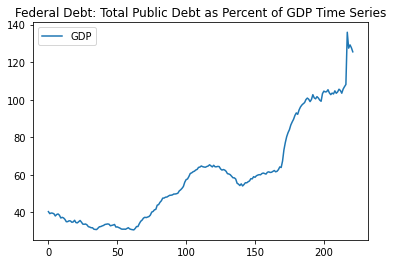

In [ ]:
debt_data.plot()
plt.title('Federal Debt: Total Public Debt as Percent of GDP Time Series')
plt.show

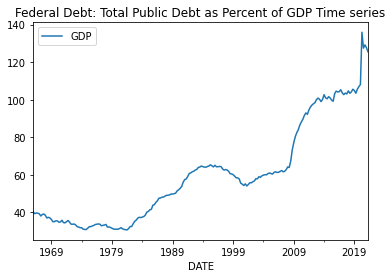

In [ ]:
debt_data.index = pd.to_datetime(debt_data.DATE)
debt_data.plot()
plt.title('Federal Debt: Total Public Debt as Percent of GDP Time series')
plt.show()

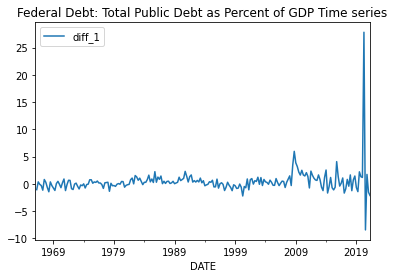

In [ ]:
debt_data['diff_1'] = debt_data.GDP - debt_data.GDP.shift()
debt_data.plot(y='diff_1')
plt.title('Federal Debt: Total Public Debt as Percent of GDP Time series')
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Federal Debt PACF')

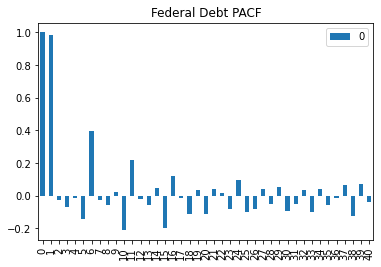

In [ ]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(debt_data.GDP))
x_acf.plot(kind='bar')
plt.title("Federal Debt PACF")

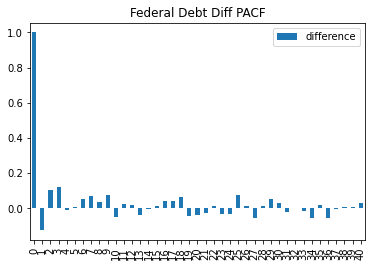

In [ ]:
x_acf = pd.DataFrame(pacf(debt_data.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("Federal Debt Diff PACF")
plt.legend(['difference'])

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(debt_data.GDP, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                  D.GDP   No. Observations:                  221
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -488.939
Method:                           css   S.D. of innovations              2.211
Date:                Thu, 02 Sep 2021   AIC                            981.879
Time:                        03:36:30   BIC                            988.675
Sample:                    04-01-1966   HQIC                           984.623
                         - 04-01-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3854      0.149      2.591      0.010       0.094       0.677
Residuals Description
count    2.210000e+02
mean     8.841595e-17
std      2.216046e+00
min     -8.853091e+00
25%     -7.114206e-01

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(debt_data.GDP, order=(0,1,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                  D.GDP   No. Observations:                  221
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -487.496
Method:                       css-mle   S.D. of innovations              2.197
Date:                Thu, 02 Sep 2021   AIC                            980.991
Time:                        05:28:07   BIC                            991.186
Sample:                    04-01-1966   HQIC                           985.107
                         - 04-01-2021                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3873      0.133      2.918      0.004       0.127       0.647
ma.L1.D.GDP    -0.1022      0.059     -1.725      0.086      -0.218       0.014
                                    Roots       

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(debt_data.GDP, order=(0,0,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                    GDP   No. Observations:                  222
Model:                     ARMA(0, 1)   Log Likelihood                -894.947
Method:                       css-mle   S.D. of innovations             13.519
Date:                Thu, 02 Sep 2021   AIC                           1795.893
Time:                        05:47:35   BIC                           1806.101
Sample:                    01-01-1966   HQIC                          1800.015
                         - 04-01-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.8257      1.799     33.257      0.000      56.300      63.352
ma.L1.GDP      0.9870      0.013     75.574      0.000       0.961       1.013
                                    Roots           

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(debt_data.GDP, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                    GDP   No. Observations:                  222
Model:                     ARMA(1, 0)   Log Likelihood                -503.250
Method:                       css-mle   S.D. of innovations              2.239
Date:                Thu, 02 Sep 2021   AIC                           1012.499
Time:                        03:37:18   BIC                           1022.707
Sample:                    01-01-1966   HQIC                          1016.621
                         - 04-01-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.1362        nan        nan        nan         nan         nan
ar.L1.GDP      1.0000        nan        nan        nan         nan         nan
                                    Roots           

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(debt_data.GDP, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                  D.GDP   No. Observations:                  221
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -486.786
Method:                       css-mle   S.D. of innovations              2.189
Date:                Thu, 02 Sep 2021   AIC                            981.573
Time:                        05:51:00   BIC                            995.165
Sample:                    04-01-1966   HQIC                           987.061
                         - 04-01-2021                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3867      0.133      2.897      0.004       0.125       0.648
ar.L1.D.GDP    -0.3795      0.270     -1.405      0.161      -0.909       0.150
ma.L1.D.GDP     0.2498      0.278      0.897    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(debt_data.GDP, order=(0,0,1))
model_fit = model.fit(trend='nc', full_output=True, disp=1)
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                    GDP   No. Observations:                  222
Model:                     ARMA(0, 1)   Log Likelihood               -1093.073
Method:                       css-mle   S.D. of innovations             32.873
Date:                Thu, 02 Sep 2021   AIC                           2190.147
Time:                        05:50:41   BIC                           2196.952
Sample:                    01-01-1966   HQIC                          2192.894
                         - 04-01-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.GDP      1.0000      0.014     72.599      0.000       0.973       1.027
                                    Roots                                    
                  Real          Imaginary           M

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'Histogram of Residuals')

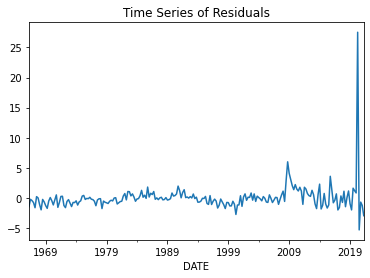

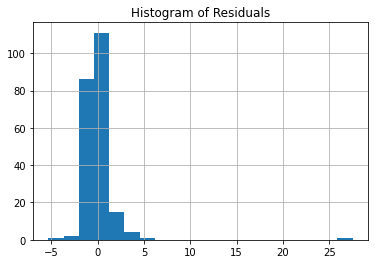

In [ ]:
residuals = pd.DataFrame(model_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

The MA part indicates that the regression error is actually a linear combination of error terms whose values occurred contemporaneously and a t avrious times in the past.

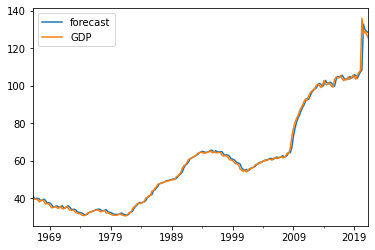

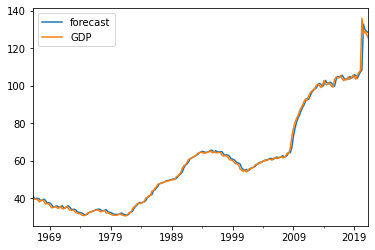

In [ ]:
model_fit.plot_predict()